## <p style="text-align:center;font-weight:500;">Experiment 8</p>
Name: Hatim Sawai  
Uid: 2021300108  
Batch: C  

### Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Preprocessing

In [4]:
# Drop the 'CUST_ID' column as it's an identifier
df = df.drop("CUST_ID", axis=1)
# Handle missing values
df = df.fillna(0)  # You may choose another strategy based on your dataset
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

### Determine no. of clusters using elbow method

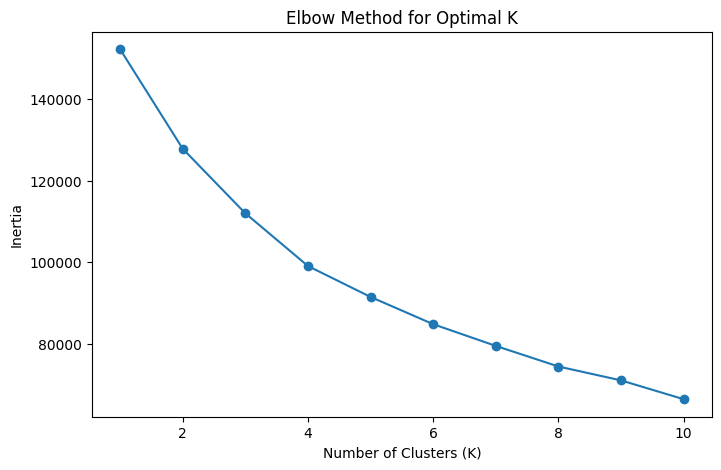

In [5]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

### Apply K-Means Clustering

In [6]:
# Choose the optimal K value and fit the K-Means model
optimal_k = 3  # Replace with the chosen K value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(data_scaled)

In [7]:
# Analyze the characteristics of each cluster
cluster_means = df.groupby("Cluster").mean()
cluster_means

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,3985.674014,0.958839,382.738556,248.550496,134.265694,3867.802726,0.231472,0.111047,0.143258,0.447755,12.408035,5.552417,6672.005364,3020.046826,1764.595439,0.033838,11.347144
1,2230.302719,0.981507,4264.856928,2714.253395,1551.088577,460.879510,0.949175,0.667220,0.744997,0.063383,1.536783,56.471302,7735.610348,4150.678057,1244.697393,0.298149,11.923201
2,799.671003,0.834970,505.449791,253.078771,252.691765,331.597837,0.464996,0.132312,0.345089,0.068278,1.210784,8.652451,3271.793070,909.528452,508.735408,0.155724,11.479575


### Visualize the clusters

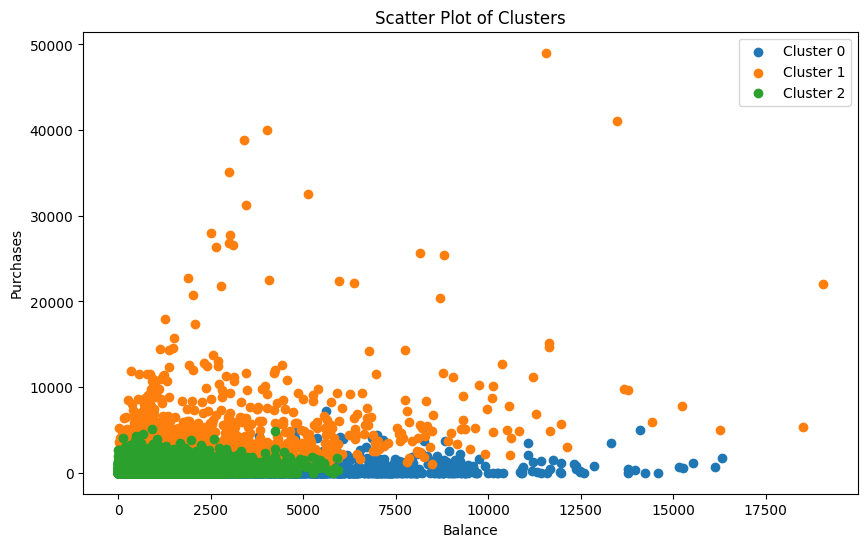

In [8]:
selected_clusters = [0, 1, 2]  # Replace with the clusters you want to visualize

plt.figure(figsize=(10, 6))
for cluster in selected_clusters:
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["BALANCE"], cluster_data["PURCHASES"], label=f"Cluster {cluster}"
    )

plt.title("Scatter Plot of Clusters")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.legend()
plt.show()

### Interpret the clusters


The above plot shows the clusters of the data points. The data points are clustered into 3 clusters. The data points in the cluster 0 are the ones which have low income and low spending score. The data points in the cluster 1 are the ones which have high income and high spending score. The data points in the cluster 2 are the ones which have medium income and medium spending score.